In [168]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py

%matplotlib inline

In [169]:
def load_summary(filename):
    dtype=[('FOFID', 'i8'),
           ('MFOF', 'f8'), 
           ('Mstar', 'f8'),
           ('vmax', 'f8'),
           ('x', 'f8'),
           ('y', 'f8'),
           ('z', 'f8'),
           ('vx', 'f8'),
           ('vy', 'f8'),
           ('vz', 'f8')]
    summary = np.loadtxt(filename, dtype=dtype)    
    return summary

In [170]:
BoxSize = 720.0

In [200]:
galaxy_A = load_summary("../data/vmax_selected/summary_halo_A_box_04.txt")
galaxy_B = load_summary("../data/vmax_selected/summary_halo_B_box_04.txt")
galaxy_G = load_summary("../data/vmax_selected/summary_halo_general_box_04.txt")

In [201]:
vel_A = np.sqrt(galaxy_A['vx']**2 + galaxy_A['vy']**2 + galaxy_A['vz']**2)
vel_B = np.sqrt(galaxy_B['vx']**2 + galaxy_B['vy']**2 + galaxy_B['vz']**2)
vel_G = np.sqrt(galaxy_G['vx']**2 + galaxy_G['vy']**2 + galaxy_G['vz']**2)

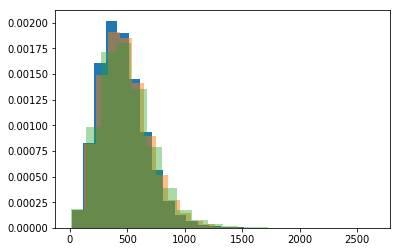

In [202]:
_ = plt.hist(vel_A, bins=20, density=True)
_ = plt.hist(vel_B, bins=20, alpha=0.5, density=True)
_ = plt.hist(vel_G, bins=20, alpha=0.4, density=True)

In [203]:
relative_pos = np.sqrt((galaxy_B['x']-galaxy_A['x'])**2+(galaxy_B['y']-galaxy_A['y'])**2+(galaxy_B['z']-galaxy_A['z'])**2)

relative_radial_vel = (galaxy_B['vx']-galaxy_A['vx'])*(galaxy_B['x']-galaxy_A['x'])+\
(galaxy_B['vy']-galaxy_A['vy'])*(galaxy_B['y']-galaxy_A['y'])+\
(galaxy_B['vz']-galaxy_A['vz'])*(galaxy_B['z']-galaxy_A['z'])
relative_radial_vel = relative_radial_vel/relative_pos

relative_vel = np.sqrt((galaxy_B['vx']-galaxy_A['vx'])**2 +
                      (galaxy_B['vy']-galaxy_A['vy'])**2+
                      (galaxy_B['vz']-galaxy_A['vz'])**2)

relative_tan_vel = np.sqrt((relative_vel**2 - relative_radial_vel**2))

print(relative_pos.min()/0.678)

kk = (galaxy_A['x']>10) & (galaxy_A['x']<710)
kk &= (galaxy_A['y']>10) & (galaxy_A['y']<710)
kk &= (galaxy_A['z']>10) & (galaxy_A['z']<710)
kk = (galaxy_B['x']>10) & (galaxy_B['x']<710)
kk &= (galaxy_B['y']>10) & (galaxy_B['y']<710)
kk &= (galaxy_B['z']>10) & (galaxy_B['z']<710)

ii = ((galaxy_A['vmax'] < 240) & (galaxy_B['vmax']<240)) 
ii &= (relative_radial_vel < 0) & (relative_radial_vel > -120) & (relative_tan_vel < 80) & (relative_pos<1.0)
ii &=  (relative_pos<1E4)  & kk

jj = ((vel_B > 610)) & (relative_pos<1E4)  & kk & ((galaxy_A['vmax'] < 240) & (galaxy_B['vmax']<240)) 

ll = ((galaxy_G['vmax'] < 240))

print('all conditions', np.count_nonzero(ii))
print('only peculiar vel', np.count_nonzero(jj))
print('all not massive', np.count_nonzero(galaxy_G[ll]))

1.0324590407888108
all conditions 109
only peculiar vel 762
all not massive 273252


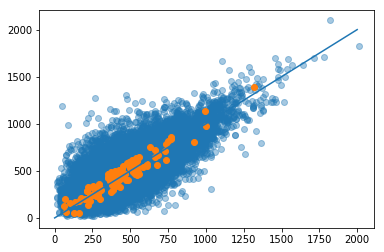

In [204]:
x=np.linspace(0,2000,10)
plt.scatter(vel_A, vel_B, alpha=0.4)
plt.scatter(vel_A[ii], vel_B[ii])
plt.plot(x,x)

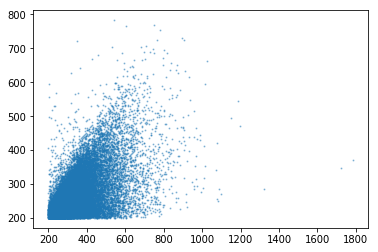

In [205]:
x=np.linspace(0,1200,10)
plt.scatter(galaxy_A['vmax'], galaxy_B['vmax'], alpha=0.4, s=1)
#plt.scatter(vel_A[ii], vel_B[ii])
#plt.plot(x,x)

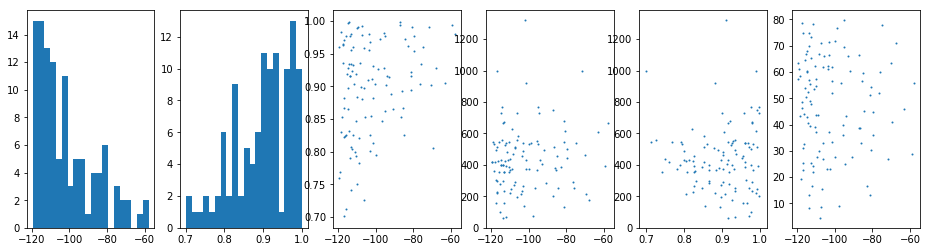

In [206]:
plt.figure(figsize=(16,4))
plt.subplot(1,6,1)
_ = plt.hist(relative_radial_vel[ii], bins=20)
plt.subplot(1,6,2)
_ = plt.hist(relative_pos[ii], bins=20)
plt.subplot(1,6,3)
plt.scatter(relative_radial_vel[ii], relative_pos[ii], s=1.0)

plt.subplot(1,6,4)
plt.scatter(relative_radial_vel[ii], vel_A[ii], s=1.0)

plt.subplot(1,6,5)
plt.scatter(relative_pos[ii], vel_A[ii], s=1.0)

plt.subplot(1,6,6)
plt.scatter(relative_radial_vel[ii], relative_tan_vel[ii], s=1.0)

29161


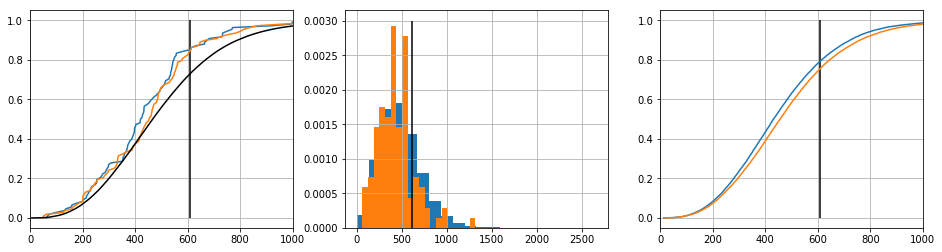

In [207]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sorted_vel_A = np.sort(vel_A[ii])
sorted_vel_B = np.sort(vel_B[ii])
sorted_vel_G = np.sort(vel_G[ll])

integrated = np.linspace(0.0, 1.0, len(sorted_vel_A))
plt.plot(sorted_vel_A, integrated)
plt.plot(sorted_vel_B, integrated)
plt.plot(sorted_vel_G, np.linspace(0,1,len(sorted_vel_G)), color='black')
plt.vlines(610, 0, 1)
plt.xlim([0,1000])
plt.grid()

plt.subplot(1,3,2)
plt.hist(vel_G, bins=20, density=True)
plt.hist(vel_A[ii], bins=20, density=True)
plt.vlines(610, 0, 3E-3)
plt.grid()

plt.subplot(1,3,3)
sorted_vel_A = np.sort(vel_A)
sorted_vel_B = np.sort(vel_B)
integrated = np.linspace(0.0, 1.0, len(sorted_vel_A))
print(len(sorted_vel_A))
plt.plot(sorted_vel_A, integrated)
plt.plot(sorted_vel_B, integrated)
plt.vlines(610, 0, 1)
plt.xlim([0,1000])
plt.grid()

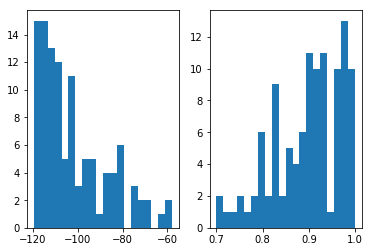

In [208]:
plt.subplot(1,2,1)
_ = plt.hist(relative_radial_vel[ii], bins=20)
plt.subplot(1,2,2)
_ = plt.hist(relative_pos[ii], bins=20)

436.8716350587533 204.26621896049423
[237.488136   420.73467661 575.3616    ]


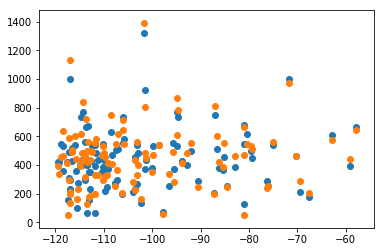

In [209]:
plt.scatter(relative_radial_vel[ii], vel_A[ii])
plt.scatter(relative_radial_vel[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

436.8716350587533 204.26621896049423


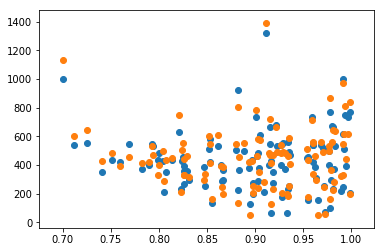

In [210]:
plt.scatter(relative_pos[ii], vel_A[ii])
plt.scatter(relative_pos[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))

In [211]:
print(np.count_nonzero(ii))

109


In [212]:
sorted_vmax_A = np.sort(galaxy_A['vmax'][jj])
sorted_vmax_B = np.sort(galaxy_B['vmax'][jj])
integrated = np.linspace(1.0, 0.0, len(sorted_vmax_A))

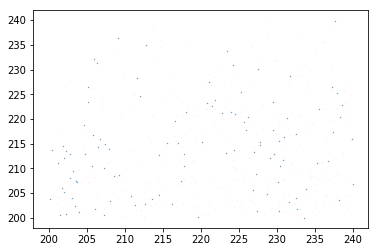

In [213]:
plt.scatter(galaxy_A['vmax'][ii], galaxy_B['vmax'][ii], alpha=1.0, s=0.1)
plt.scatter(galaxy_A['vmax'][jj], galaxy_B['vmax'][jj], alpha=0.1, s=0.1)

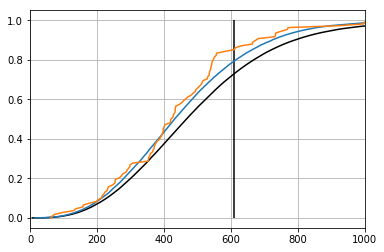

In [224]:
plt.plot(np.sort(vel_G[ll]), np.linspace(0,1,np.count_nonzero(ll)), color='black')
plt.plot(np.sort(vel_A), np.linspace(0,1,len(galaxy_A['vmax'])))
plt.plot(np.sort(vel_A[ii]), np.linspace(0,1,len(galaxy_A['vmax'][ii])))
#plt.plot(np.sort(vel_A[jj]), np.linspace(0,1,len(galaxy_A['vmax'][jj])))
plt.vlines(610, 0, 1)
plt.xlim([0,1000])
plt.grid()

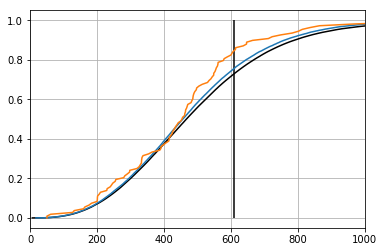

In [225]:
plt.plot(np.sort(vel_G[ll]), np.linspace(0,1,np.count_nonzero(ll)), color='black')
plt.plot(np.sort(vel_B), np.linspace(0,1,len(galaxy_B['vmax'])))
plt.plot(np.sort(vel_B[ii]), np.linspace(0,1,len(galaxy_B['vmax'][ii])))
#plt.plot(np.sort(vel_B[jj]), np.linspace(0,1,len(galaxy_B['vmax'][jj])))
plt.xlim([0,1000])
plt.vlines(610, 0, 1)

plt.grid()

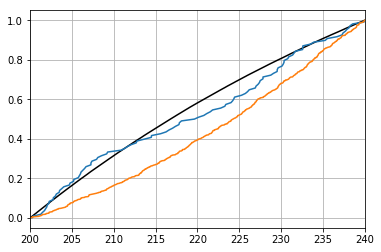

In [216]:
plt.plot(np.sort(galaxy_G['vmax'][ll]), np.linspace(0,1,np.count_nonzero(galaxy_G['vmax'][ll])), color='black')
plt.plot(np.sort(galaxy_A['vmax'][ii]), np.linspace(0,1,len(galaxy_A['vmax'][ii])))
plt.plot(np.sort(galaxy_A['vmax'][jj]), np.linspace(0,1,len(galaxy_A['vmax'][jj])))

#plt.plot(np.sort(galaxy_A['vmax']), np.linspace(0,1,len(galaxy_A['vmax'])))
#plt.plot(np.sort(galaxy_A['vmax'][jj]), np.linspace(0,1,len(galaxy_A['vmax'][jj])))
plt.xlim([200,240])
plt.grid()

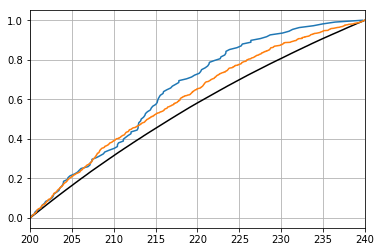

In [217]:
plt.plot(np.sort(galaxy_G['vmax'][ll]), np.linspace(0,1,np.count_nonzero(galaxy_G['vmax'][ll])), color='black')
plt.plot(np.sort(galaxy_B['vmax'][ii]), np.linspace(0,1,len(galaxy_A['vmax'][ii])))
plt.plot(np.sort(galaxy_B['vmax'][jj]), np.linspace(0,1,len(galaxy_A['vmax'][jj])))

#plt.plot(np.sort(galaxy_B['vmax']), np.linspace(0,1,len(galaxy_A['vmax'])))
#plt.plot(np.sort(galaxy_B['vmax'][jj]), np.linspace(0,1,len(galaxy_A['vmax'][jj])))
plt.xlim([200,240])
plt.grid()